---
---

<h1 align='center'> Anamoly Detection </h1>
<h2 align='center'> Bert Cased Feature Extraction with Full-Data</h2> 


*   ML[Smote(Bert features extracted from pretrained model)]
*   Bert+NN full trainable

>**Need to do before running this code:** `have the clean_data.csv file uploaded`

>**First Phase: Bert Feature Extraction** 
>>After installing all the dependencies, Run the code 
* `[1st]` hyperlink works in colab and `[2nd]` hyperlink works in jupyter
* from: [START-CELL](#scrollTo=896885c2-3bf0-49bf-a75f-0018ec2104f9) `or` [START-CELL](#Import-Libraries) --> `Import Packages Cell` 
* to: [END-CELL](#scrollTo=d007b732-7657-48af-ae3c-daa0210d3031) `or` [END-CELL](#Transfer-Learning-Approches) --> `Cell before #Transfer Learning Approches` 
* untill u get 100% features extracted for all the data sentences. 
* Download and keep local copy of the BertFeatures.csv for safty.

>**Second Phase: ML algorithims on Bert-Features** 

---
---

## *Dependencies*
Install these dependencies only once into your environment

In [1]:
#!pip3 install tensorflow_text
#!pip3 install tensorflow_hub
#!pip3 install tensorflow-gpu
#!pip3 install imblearn
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

## *Import Libraries*
Make sure your 'clean_data' is uploaded into the workspace

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow import keras
import tensorflow as tf
if (len(tf.config.list_physical_devices('GPU'))!=0):
    tf.config.experimental.set_memory_growth(tf.config.list_physical_devices('GPU')[0], True)

import warnings
warnings.filterwarnings('ignore')

## Read File

In [3]:
import pandas as pd
data = pd.read_csv("cleaned_data.csv")

#expanding the dispay of text sms column
pd.set_option('display.max_colwidth', -1)

In [4]:
#Print the dataframe
data.head()

,X_data,Y_data
0,1 81109 203518 143 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 19 102 54106 dest 10 250 19 102 50010 E5 Receiving block src dest,0
1,2 81109 203518 35 INFO dfs FSNamesystem BLOCK NameSystem allocateBlock mnt hadoop mapred system job2008110920300001 job jar blk1608999687919862906 E22 BLOCK NameSystem allocateBlock,0
2,3 81109 203519 143 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 10 6 40524 dest 10 250 10 6 50010 E5 Receiving block src dest,0
3,4 81109 203519 145 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 14 224 42420 dest 10 250 14 224 50010 E5 Receiving block src dest,0
4,5 81109 203519 145 INFO dfs DataNode PacketResponder PacketResponder 1 for block blk1608999687919862906 terminating E11 PacketResponder for block terminating,0


In [5]:
# run this cell block only once
# in the cleaned data, first word is index, which we dont require as a data input
data['X_data'] = data['X_data'].apply(lambda s: s.split(' ', 1)[1])

In [6]:
#Print the dataframe
data

,X_data,Y_data
0,81109 203518 143 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 19 102 54106 dest 10 250 19 102 50010 E5 Receiving block src dest,0
1,81109 203518 35 INFO dfs FSNamesystem BLOCK NameSystem allocateBlock mnt hadoop mapred system job2008110920300001 job jar blk1608999687919862906 E22 BLOCK NameSystem allocateBlock,0
2,81109 203519 143 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 10 6 40524 dest 10 250 10 6 50010 E5 Receiving block src dest,0
3,81109 203519 145 INFO dfs DataNode DataXceiver Receiving block blk1608999687919862906 src 10 250 14 224 42420 dest 10 250 14 224 50010 E5 Receiving block src dest,0
4,81109 203519 145 INFO dfs DataNode PacketResponder PacketResponder 1 for block blk1608999687919862906 terminating E11 PacketResponder for block terminating,0
...,...,...
104810,81109 210122 13 INFO dfs DataBlockScanner Verification succeeded for blk8738709778586756237 E2 Verification succeeded for,0
104811,81109 210124 13 INFO dfs DataBlockScanner Verification succeeded for blk6420476111425645508 E2 Verification succeeded for,0
104812,81109 210126 13 INFO dfs DataBlockScanner Verification succeeded for blk2382389751032389929 E2 Verification succeeded for,0
104813,81109 210126 13 INFO dfs DataBlockScanner Verification succeeded for blk4856031730010032819 E2 Verification succeeded for,0


## Exploratory Data Analysis

        X_data
Y_data        
0       101544
1       3271  


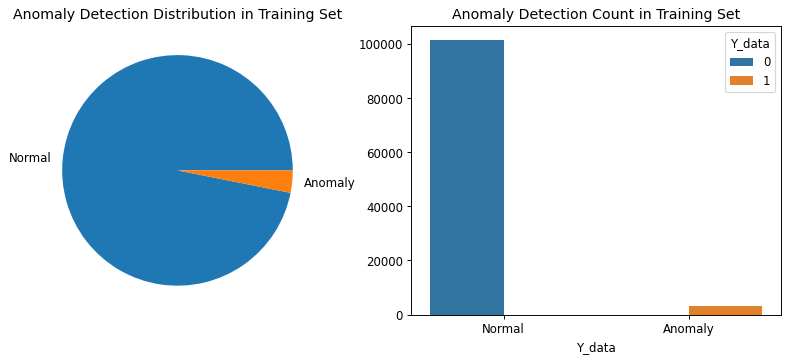

In [7]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), dpi=85)
plt.tight_layout()

distribution = data.groupby('Y_data').count()
print(distribution)
distribution['X_data'].plot(kind='pie', ax=axes[0], labels=['Normal', 'Anomaly'])
sns.countplot(x=data['Y_data'], hue=data['Y_data'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Normal', 'Anomaly'])
axes[0].tick_params(axis='x', labelsize=10)
axes[0].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].tick_params(axis='y', labelsize=10)

axes[0].set_title('Anomaly Detection Distribution in Training Set', fontsize=12)
axes[1].set_title('Anomaly Detection Count in Training Set', fontsize=12)

plt.show()

## **Bert Models** (*Hugging Face*)

In [8]:
map_name_to_handle = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_L-12_H-768_A-12/4',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-2_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-10_H-768_A-12/1',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-128_A-2/1',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-256_A-4/1',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-512_A-8/1',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-12_H-768_A-12/2',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_base/2',
    'electra_small':
        'https://tfhub.dev/google/electra_small/2',
    'electra_base':
        'https://tfhub.dev/google/electra_base/2',
    'experts_pubmed':
        'https://tfhub.dev/google/experts/bert/pubmed/2',
    'experts_wiki_books':
        'https://tfhub.dev/google/experts/bert/wiki_books/2',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/talkheads_ggelu_bert_en_base/1',
}

map_model_to_preprocess = {
    'bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_en_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-2_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-4_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-6_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-8_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-10_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-128_A-2':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-256_A-4':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'small_bert/bert_en_uncased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'bert_multi_cased_L-12_H-768_A-12':
        'https://tfhub.dev/tensorflow/bert_multi_cased_preprocess/3',
    'albert_en_base':
        'https://tfhub.dev/tensorflow/albert_en_preprocess/3',
    'electra_small':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'electra_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_pubmed':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'experts_wiki_books':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
    'talking-heads_base':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

print('Available Pretrained Models:',*list(map_name_to_handle.keys()), sep = "\n")

Available Pretrained Models:
bert_en_uncased_L-12_H-768_A-12
bert_en_cased_L-12_H-768_A-12
bert_multi_cased_L-12_H-768_A-12
small_bert/bert_en_uncased_L-2_H-128_A-2
small_bert/bert_en_uncased_L-2_H-256_A-4
small_bert/bert_en_uncased_L-2_H-512_A-8
small_bert/bert_en_uncased_L-2_H-768_A-12
small_bert/bert_en_uncased_L-4_H-128_A-2
small_bert/bert_en_uncased_L-4_H-256_A-4
small_bert/bert_en_uncased_L-4_H-512_A-8
small_bert/bert_en_uncased_L-4_H-768_A-12
small_bert/bert_en_uncased_L-6_H-128_A-2
small_bert/bert_en_uncased_L-6_H-256_A-4
small_bert/bert_en_uncased_L-6_H-512_A-8
small_bert/bert_en_uncased_L-6_H-768_A-12
small_bert/bert_en_uncased_L-8_H-128_A-2
small_bert/bert_en_uncased_L-8_H-256_A-4
small_bert/bert_en_uncased_L-8_H-512_A-8
small_bert/bert_en_uncased_L-8_H-768_A-12
small_bert/bert_en_uncased_L-10_H-128_A-2
small_bert/bert_en_uncased_L-10_H-256_A-4
small_bert/bert_en_uncased_L-10_H-512_A-8
small_bert/bert_en_uncased_L-10_H-768_A-12
small_bert/bert_en_uncased_L-12_H-128_A-2
small

In [9]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

# Choose the Model: 
# as our data is Cased (with lower and caps letters), we cased bert model
bert_model_name = 'bert_en_cased_L-12_H-768_A-12' 

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

#tf.compat.v1.disable_eager_execution()
bert_preprocess = hub.KerasLayer(tfhub_handle_preprocess, name='preprocess', trainable=False)
bert_encoder = hub.KerasLayer(tfhub_handle_encoder, name='encoder', trainable=False)

BERT model selected           : https://tfhub.dev/tensorflow/bert_en_cased_L-12_H-768_A-12/4
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_cased_preprocess/3


## Feature Extraction

In [10]:
# this block needs to be mannually done
import os

if os.path.exists("iters.npy"):
  print("Loaded Previously saved series of iteration starts")
  srt = list(np.load('iters.npy'))
else:
  print("Unable to find saved series file, Starting from stratch (zero)")
  srt = [0] # reset
if os.path.exists("BertFeatures.csv"):
  print("Saved Bert Features file found!")
  with open("BertFeatures.csv",'r') as f:
    last_line_no = len(f.readlines())
    if last_line_no != srt[-1]:
      print("\nSaved Bert Features last line no. doesnt match iteration log,\n\
Execution might have abruptly interupted in previous runtime\n\
So adding last line no. into iteration log.")
      srt.append(last_line_no)

Loaded Previously saved series of iteration starts
Saved Bert Features file found!

Saved Bert Features last line no. doesnt match iteration log,
Execution might have abruptly interupted in previous runtime
So adding last line no. into iteration log.


In [11]:
print("started from i-values:",srt[::-1])

started from i-values: [104815, 103820, 101324, 98760, 93864, 91480, 88891, 86457, 81388, 79421, 77146, 71956, 69731, 65788, 63262, 60891, 58487, 54967, 52982, 49590, 44444, 40940, 38342, 35950, 27443, 24001, 21740, 16970, 12366, 9894, 7367, 1943, 0]


In [12]:
from tqdm import tqdm
import csv
import psutil

thresh = 500
if len(srt) == 1: 
  mode = 'w'
else:
  mode = 'a'

with open("BertFeatures.csv",mode) as f:
  writer = csv.writer(f, delimiter=',', lineterminator='\n')
  
  for i in tqdm(range(len(data['X_data']))):
    if i<srt[-1]:
      continue
    
    if (i%thresh==0):
      tf.keras.backend.clear_session()
    # clear tensorflow ram when it exceeds 95 percent of ram usage
    # restart the runtime for faster performance:
    if psutil.virtual_memory().percent > 95:
      print("Memory almost full!, Restart the Kernel and run again to continue progress")
      tf.keras.backend.clear_session()
      srt.append(i)
      np.save('iters.npy',srt);
      break
    
    j = data['X_data'][i]
    # bert window size = 1, as each sentence is featurized independently
    bert_results = bert_encoder(bert_preprocess([j]))
    bert_out = bert_results["pooled_output"].numpy()[0]
    writer.writerow(bert_out)

100%|█████████████████████████████████████████████████████████████████████| 104815/104815 [00:00<00:00, 3692846.36it/s]


In [14]:
#Checking Saved Bert Features
features = pd.read_csv("BertFeatures.csv",header=None)
features.shape

(104815, 768)

---
# **Transfer Learning Approches**
*restart the kernel for faster run-time as features are extracted from bert transformer and saved*

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
x = pd.read_csv("BertFeatures.csv",header=None)
data = pd.read_csv("cleaned_data.csv")
y = data['Y_data'].apply(lambda x: -1 if x == 0 else 1)

### Train/Test/Validation Data-Split (without upsampling)

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# split train dataset into train, validation and test sets
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(x, y,
                                                                            random_state=2022, 
                                                                            test_size=0.1, 
                                                                            stratify=y)

class_names = ['Normal','Anomaly']

### ***Solving Data Imbalance***

In [3]:
# import library
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape', x.shape)
print('Resample dataset shape', x_smote.shape)
SmoteData = x_smote.copy()
SmoteData['Y_data'] = y_smote
SmoteData.groupby('Y_data').count()

Original dataset shape (104815, 768)
Resample dataset shape (203088, 768)


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
Y_data,,,,,,,,,,,,,,,,,,,,,
-1,101544,101544,101544,101544,101544,101544,101544,101544,101544,101544,...,101544,101544,101544,101544,101544,101544,101544,101544,101544,101544
1,101544,101544,101544,101544,101544,101544,101544,101544,101544,101544,...,101544,101544,101544,101544,101544,101544,101544,101544,101544,101544


### Train/Test/Validation Data-Split (on upsampled data)

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# split train dataset into train, validation and test sets
train_features2, test_features2, train_labels2, test_labels2 = train_test_split(x_smote, y_smote,
                                                                            random_state=2022, 
                                                                            test_size=0.1)

breaks = 10
class_names = ['Normal','Anomaly']

---
<h2 align='center'> --> ML models with Hyper-parameter tuning <-- </h2>
    
---

#### *Searching for the best model*
These above features-data is given as inputs for ML-Classifiers and best out them is found

ML Models not implemented: (taking very long time on large dataset)
- One Class SVM
- SVC
- Local Outlier Factor
- Gradient Boosting
- Random Forest
- Ada Boost
- Gaussian Process (Out of Memory)

**SVM not applied reason:** 
- https://stackoverflow.com/questions/55471576/increase-speed-for-svm-with-polynomial-kernel/55544151#55544151
- https://stats.stackexchange.com/questions/314329/can-support-vector-machine-be-used-in-large-data

SVM has a training time that scales quadratically with the number of samples, or worse. For O(n^2) the time is proportional to c * n^2).

In [5]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier, SGDOneClassSVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

names = ["Lin OneClassSVM - SGD", "IsolationForest", "lbfgs Log-Reg", "saga Log-Reg", 
         "SGD", "Naive Bayes", "KNN", "Neural Net", "QDA", "LGBM", "XGB", "Decision Tree",]

classifiers = [SGDOneClassSVM(max_iter=10000,verbose=1), IsolationForest(verbose=1),
               LogisticRegression(solver='lbfgs',verbose=1), LogisticRegression(solver='saga',verbose=1), 
               SGDClassifier(verbose=1), GaussianNB(), KNeighborsClassifier(n_neighbors=10),
               MLPClassifier(max_iter=50,early_stopping=True,verbose=1), QuadraticDiscriminantAnalysis(), 
               LGBMClassifier(verbose=1), XGBClassifier(), DecisionTreeClassifier(max_depth=15)]

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time
from tqdm import tqdm

def runML(train_features, train_labels, test_features, test_labels):
    for i in range(len(class_names)):
        if (i == 0):
            ii = -1
        else:
            ii = 1
        print("CLASS - (",ii,") -->",class_names[i])

    fig = plt.figure(figsize=(18,14))
    fig.tight_layout()
    nof_clsfrs = len(names)
    Metrics = {}
    
    print('\nClassification Report for each Classifier:')
    for i in range(nof_clsfrs):
        metric = []
        classifier = classifiers[i]
        rows=nof_clsfrs//4
        if nof_clsfrs%4!=0:
            rows+=1
        plt.subplot(rows,4,i+1)
        plt.xticks([])
        plt.yticks([])
    
        print(f'\n\nClassifier: {str(classifier)[:30]}...')
        start_time = time.time(); classifier.fit(train_features, train_labels); metric.append(time.time()-start_time); 
        
        start_time = time.time(); test_pred = classifier.predict(test_features); metric.append(time.time()-start_time);
        acc = accuracy_score(test_labels,test_pred) *100; metric.append(acc);
        Metrics[names[i]] = metric
        #print(f'Accuracy  is {acc}%, Report:')
        print(classification_report(test_labels, test_pred))
    
        plt.gca().set_title(names[i])
        CM = confusion_matrix(test_labels, test_pred)
        plt.imshow(CM,interpolation='nearest',cmap='summer')
        for (i, j), z in np.ndenumerate(CM):
            plt.text(j, i, z, ha='center', va='center')
        plt.xticks(np.arange(len(class_names)),class_names, fontsize=8)
        plt.yticks(np.arange(len(class_names)))
        plt.grid(False)
    plt.show()
    return Metrics

#### *Fitting and Ploting results*

##### ML on Features directly

CLASS - ( -1 ) --> Normal
CLASS - ( 1 ) --> Anomaly

Classification Report for each Classifier:


Classifier: SGDOneClassSVM(max_iter=10000,...
-- Epoch 1
Norm: 0.97, NNZs: 768, Bias: -18.551159, T: 94333, Avg. loss: 0.000860
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 1.03, NNZs: 768, Bias: -19.899681, T: 188666, Avg. loss: 0.001177
Total training time: 0.19 seconds.
-- Epoch 3
Norm: 1.07, NNZs: 768, Bias: -20.687549, T: 282999, Avg. loss: 0.001242
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 1.10, NNZs: 768, Bias: -21.246035, T: 377332, Avg. loss: 0.001368
Total training time: 0.38 seconds.
-- Epoch 5
Norm: 1.12, NNZs: 768, Bias: -21.679093, T: 471665, Avg. loss: 0.001370
Total training time: 0.47 seconds.
-- Epoch 6
Norm: 1.14, NNZs: 768, Bias: -22.032635, T: 565998, Avg. loss: 0.001478
Total training time: 0.57 seconds.
Convergence after 6 epochs took 0.57 seconds
              precision    recall  f1-score   support

          -1       0.96      0.02      0.03     1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.3s finished


              precision    recall  f1-score   support

          -1       0.95      0.18      0.30     10155
           1       0.03      0.70      0.05       327

    accuracy                           0.19     10482
   macro avg       0.49      0.44      0.18     10482
weighted avg       0.92      0.19      0.29     10482



Classifier: LogisticRegression(verbose=1)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.3s finished


              precision    recall  f1-score   support

          -1       0.97      1.00      0.99     10155
           1       1.00      0.06      0.12       327

    accuracy                           0.97     10482
   macro avg       0.99      0.53      0.55     10482
weighted avg       0.97      0.97      0.96     10482



Classifier: LogisticRegression(solver='sag...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 64 seconds
              precision    recall  f1-score   support

          -1       0.97      1.00      0.99     10155
           1       0.85      0.09      0.16       327

    accuracy                           0.97     10482
   macro avg       0.91      0.54      0.57     10482
weighted avg       0.97      0.97      0.96     10482



Classifier: SGDClassifier(verbose=1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


-- Epoch 1
Norm: 16.63, NNZs: 768, Bias: -10.359292, T: 94333, Avg. loss: 6.536379
Total training time: 0.10 seconds.
-- Epoch 2
Norm: 10.79, NNZs: 768, Bias: -10.372197, T: 188666, Avg. loss: 1.035220
Total training time: 0.20 seconds.
-- Epoch 3
Norm: 10.18, NNZs: 768, Bias: -10.417534, T: 282999, Avg. loss: 0.630436
Total training time: 0.29 seconds.
-- Epoch 4
Norm: 8.11, NNZs: 768, Bias: -10.384675, T: 377332, Avg. loss: 0.461917
Total training time: 0.39 seconds.
-- Epoch 5
Norm: 7.66, NNZs: 768, Bias: -10.406895, T: 471665, Avg. loss: 0.374803
Total training time: 0.49 seconds.
-- Epoch 6
Norm: 7.15, NNZs: 768, Bias: -10.386309, T: 565998, Avg. loss: 0.314182
Total training time: 0.59 seconds.
-- Epoch 7
Norm: 6.87, NNZs: 768, Bias: -10.370665, T: 660331, Avg. loss: 0.274850
Total training time: 0.68 seconds.
-- Epoch 8
Norm: 6.59, NNZs: 768, Bias: -10.371205, T: 754664, Avg. loss: 0.244693
Total training time: 0.78 seconds.
-- Epoch 9
Norm: 6.13, NNZs: 768, Bias: -10.383414, T:

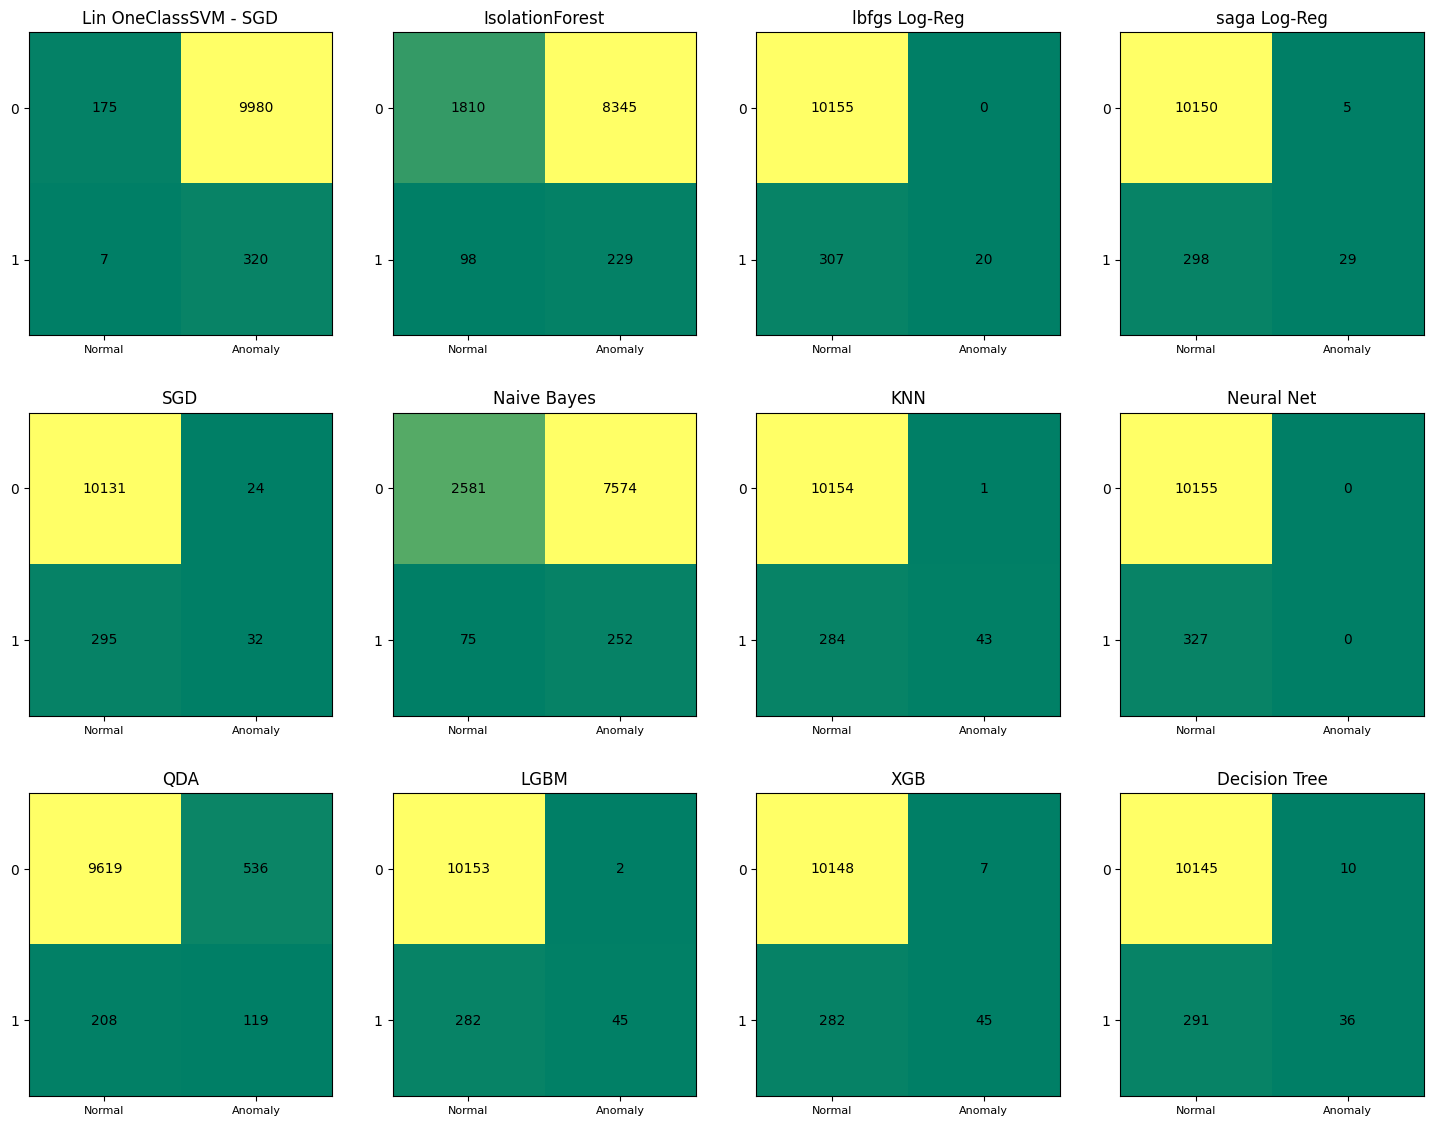

In [7]:
Metrics1 = runML(train_features1, train_labels1, test_features1, test_labels1)

##### ML on Upsampled Features

CLASS - ( -1 ) --> Normal
CLASS - ( 1 ) --> Anomaly

Classification Report for each Classifier:


Classifier: SGDOneClassSVM(max_iter=10000,...
-- Epoch 1
Norm: 1.03, NNZs: 768, Bias: -19.837287, T: 182779, Avg. loss: 0.001055
Total training time: 0.23 seconds.
-- Epoch 2
Norm: 1.09, NNZs: 768, Bias: -21.183795, T: 365558, Avg. loss: 0.001314
Total training time: 0.46 seconds.
-- Epoch 3
Norm: 1.13, NNZs: 768, Bias: -21.970371, T: 548337, Avg. loss: 0.001452
Total training time: 0.66 seconds.
-- Epoch 4
Norm: 1.16, NNZs: 768, Bias: -22.528047, T: 731116, Avg. loss: 0.001523
Total training time: 0.87 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 768, Bias: -22.960233, T: 913895, Avg. loss: 0.001622
Total training time: 1.08 seconds.
-- Epoch 6
Norm: 1.20, NNZs: 768, Bias: -23.313357, T: 1096674, Avg. loss: 0.001635
Total training time: 1.28 seconds.
Convergence after 6 epochs took 1.28 seconds
              precision    recall  f1-score   support

          -1       0.49      0.02      0.04    

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min finished


              precision    recall  f1-score   support

          -1       0.45      0.15      0.22     10087
           1       0.49      0.82      0.62     10222

    accuracy                           0.49     20309
   macro avg       0.47      0.48      0.42     20309
weighted avg       0.47      0.49      0.42     20309



Classifier: LogisticRegression(verbose=1)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.4s finished


              precision    recall  f1-score   support

          -1       0.58      0.68      0.62     10087
           1       0.62      0.51      0.56     10222

    accuracy                           0.59     20309
   macro avg       0.60      0.59      0.59     20309
weighted avg       0.60      0.59      0.59     20309



Classifier: LogisticRegression(solver='sag...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 124 seconds
              precision    recall  f1-score   support

          -1       0.66      0.73      0.69     10087
           1       0.70      0.63      0.67     10222

    accuracy                           0.68     20309
   macro avg       0.68      0.68      0.68     20309
weighted avg       0.68      0.68      0.68     20309



Classifier: SGDClassifier(verbose=1)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.1min finished


-- Epoch 1
Norm: 42.91, NNZs: 768, Bias: -7.644472, T: 182779, Avg. loss: 32.094115
Total training time: 0.26 seconds.
-- Epoch 2
Norm: 33.26, NNZs: 768, Bias: -7.611286, T: 365558, Avg. loss: 4.767498
Total training time: 0.52 seconds.
-- Epoch 3
Norm: 28.93, NNZs: 768, Bias: -7.629130, T: 548337, Avg. loss: 3.086606
Total training time: 0.78 seconds.
-- Epoch 4
Norm: 26.93, NNZs: 768, Bias: -7.673029, T: 731116, Avg. loss: 2.367382
Total training time: 1.04 seconds.
-- Epoch 5
Norm: 25.43, NNZs: 768, Bias: -7.683936, T: 913895, Avg. loss: 1.977714
Total training time: 1.30 seconds.
-- Epoch 6
Norm: 24.47, NNZs: 768, Bias: -7.703645, T: 1096674, Avg. loss: 1.749339
Total training time: 1.58 seconds.
-- Epoch 7
Norm: 23.77, NNZs: 768, Bias: -7.712174, T: 1279453, Avg. loss: 1.580970
Total training time: 1.85 seconds.
-- Epoch 8
Norm: 23.14, NNZs: 768, Bias: -7.720217, T: 1462232, Avg. loss: 1.457063
Total training time: 2.12 seconds.
-- Epoch 9
Norm: 22.67, NNZs: 768, Bias: -7.739928, 

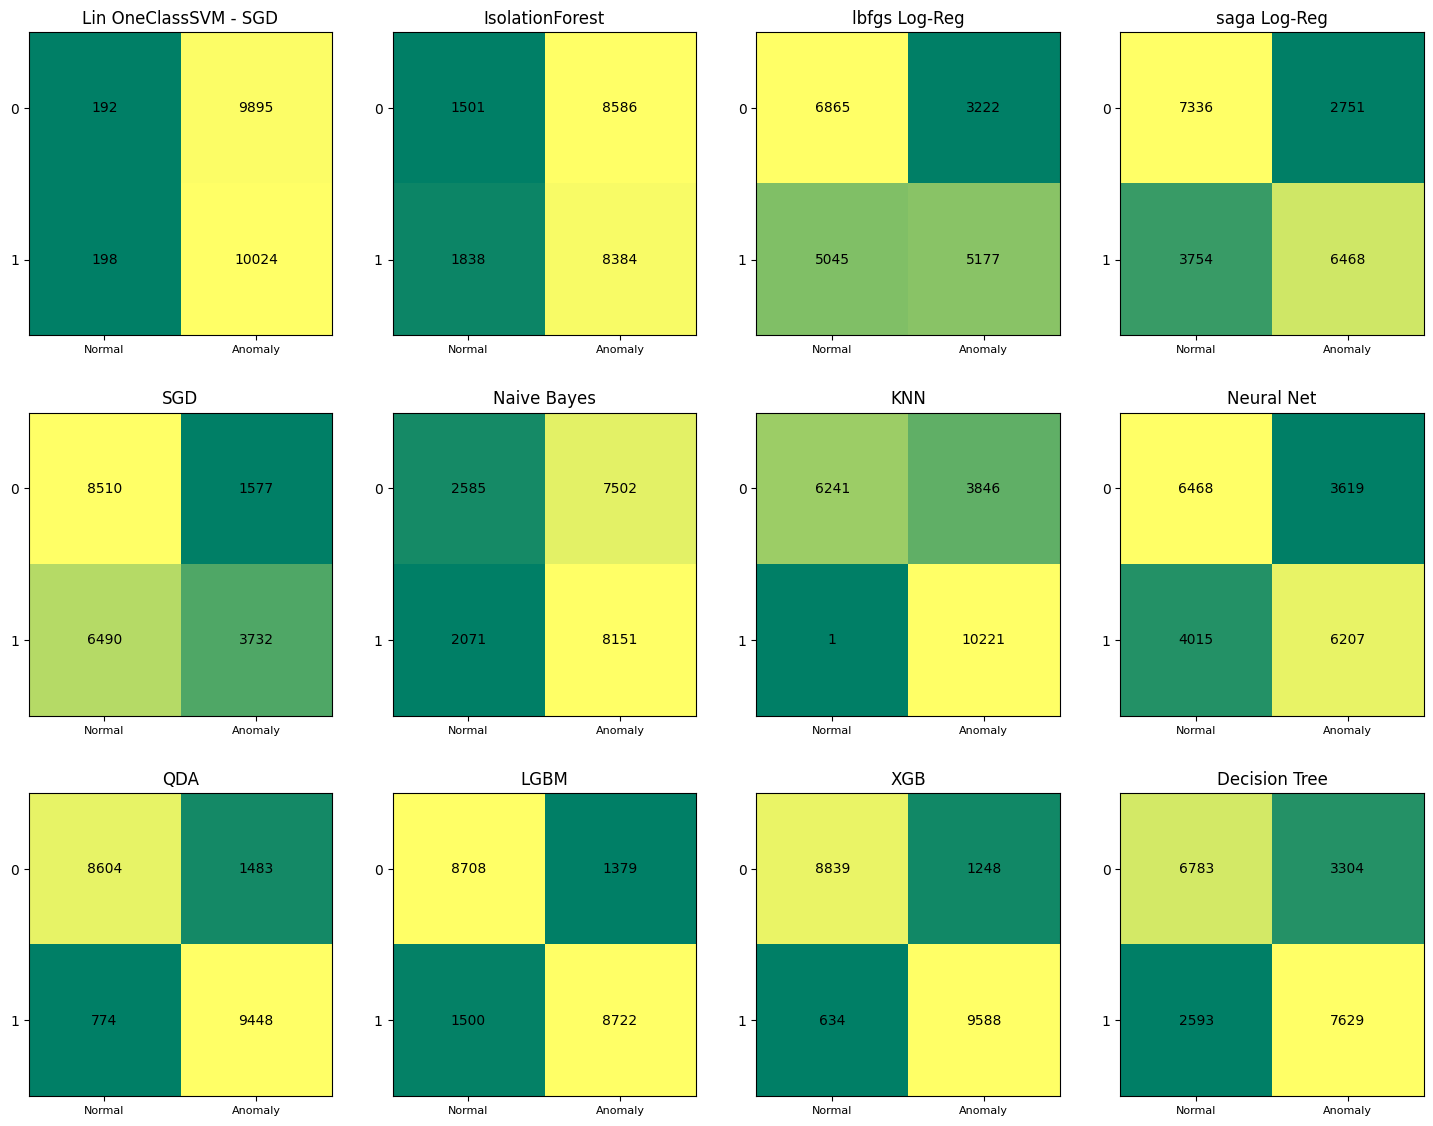

In [8]:
Metrics2 = runML(train_features2, train_labels2, test_features2, test_labels2)

#### **Results**

In [9]:
def DisplayResults(Metrics):
    result = pd.DataFrame(Metrics.values(), columns =['Training-time', 'Prediction-time', 'Accuracy'])
    result.index = Metrics.keys()
    
    print("\nClassifier for which max Accuracy is obtained:")
    print(result.loc[result["Accuracy"].idxmax()])
    
    print("\n\nClassifier for which min Training-time is obtained:")
    print(result.loc[result["Training-time"].idxmin()])
    
    print("\n\nClassifier for which min Prediction-time is obtained:")
    print(result.loc[result["Prediction-time"].idxmin()])
    
    print("\n\nResults of all the Classifiers:")
    return result.sort_values(by="Accuracy", ascending=False)

In [10]:
DisplayResults(Metrics1) #normal data without up-sampling results


Classifier for which max Accuracy is obtained:
Training-time      12.961243
Prediction-time     0.128004
Accuracy           97.290593
Name: LGBM, dtype: float64


Classifier for which min Training-time is obtained:
Training-time       0.090715
Prediction-time    26.294099
Accuracy           97.281053
Name: KNN, dtype: float64


Classifier for which min Prediction-time is obtained:
Training-time       4.901336
Prediction-time     0.011828
Accuracy           96.956688
Name: SGD, dtype: float64


Results of all the Classifiers:


,Training-time,Prediction-time,Accuracy
LGBM,12.961243,0.128004,97.290593
KNN,0.090715,26.294099,97.281053
XGB,284.646492,0.079344,97.242893
Decision Tree,107.306776,0.023936,97.128411
saga Log-Reg,64.689504,0.020222,97.109330
lbfgs Log-Reg,10.740537,0.029350,97.071170
SGD,4.901336,0.011828,96.956688
Neural Net,21.794501,0.050325,96.880366
QDA,11.861987,0.374563,92.902118
Naive Bayes,1.157873,0.141907,27.027285


In [11]:
DisplayResults(Metrics2) # upsampled data results


Classifier for which max Accuracy is obtained:
Training-time      831.987027
Prediction-time      0.099136
Accuracy            90.733172
Name: XGB, dtype: float64


Classifier for which min Training-time is obtained:
Training-time        0.210414
Prediction-time    108.248782
Accuracy            81.057659
Name: KNN, dtype: float64


Classifier for which min Prediction-time is obtained:
Training-time      25.114702
Prediction-time     0.025469
Accuracy           60.278694
Name: SGD, dtype: float64


Results of all the Classifiers:


,Training-time,Prediction-time,Accuracy
XGB,831.987027,0.099136,90.733172
QDA,33.271792,1.091287,88.886700
LGBM,40.620833,0.330549,85.824019
KNN,0.210414,108.248782,81.057659
Decision Tree,221.242877,0.051684,70.963612
saga Log-Reg,125.410409,0.029198,67.969866
Neural Net,861.884402,3.010250,62.410754
SGD,25.114702,0.025469,60.278694
lbfgs Log-Reg,19.182641,0.037899,59.293909
Naive Bayes,2.334623,0.255479,52.863263


---

##  ***Environment Specs & Details*** 

In [ ]:
#@title
#cpu
split_bar = '='*20
print(f"{split_bar} CPU {split_bar}")
cpu_info = !lscpu
for inf_item in cpu_info.get_list():
  print(inf_item)

In [ ]:
#@title
print(f"{split_bar} RAM {split_bar}")
!free -h #ram
print(f"{split_bar} CUDA {split_bar}")
!nvcc --version #cuda

In [ ]:
#@title
print(tf.test.gpu_device_name())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
!nvidia-smi